# Sweep laser pointer across the Moon from Earth

Plan: 
Use SymPy to:
1. Derive formula for distance Earth - Moon surface as a function of the sweep angle from Earth perspective
2. Derive formula for the arrival time as a function of the sweep angle under consideration of the sweep angular speed

Plot the following:
- Arrival time vs sweep angle
- Moon surface location vs sweep angle
...


In [1]:
import sympy
from sympy import *

# Parameters for the calculations

c = symbols('c', positive=True ) # Speed of light in vacuum
R = symbols('R', positive=True ) # Radius of the Moon (target sphere)
D = symbols('D', positive=True ) # Distance Earth to Moon center
alpha = symbols('alpha')         # Angle of laser pointer direction
omega = symbols('omega')         # Angular velocity of laser pointer movement
T = symbols('T')                 # Sweep duration
L = symbols('L', positive=True ) # Flight path length (distance Earth - Moon surface point)
a, b = symbols('a b')            # coordinates of Moon surface point
t = symbols('t')                 # time in seconds


In [2]:

geometry = solve([a*a + b*b - R*R, a - L*sin(alpha), D - b - L*cos(alpha)], L, a, b)
print( geometry[0] )
print( geometry[1] )
# select the relevant solution (must be less than D) 
pathLength = Lambda(alpha, geometry[0][0])  # define as function of alpha
surfacePointVertical = geometry[0][1]
surfacePointHorizontal = geometry[0][2]
#print(pathLength, surfacePointVertical, surfacePointHorizontal)


(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))
(D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 - sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))


In [3]:
pathLength

Lambda(alpha, D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))

In [4]:
surfacePointHorizontal

D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha)

In [5]:
surfacePointVertical

(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)

In [6]:
# Angle of the surface point
beta = asin(surfacePointVertical/R)
beta

asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R)

In [7]:
# Minimum and maximum ray distances
L_min = D - R
L_max = sqrt(D*D - R*R)

In [8]:
# Maximum/Minimum angle of Moon (full moon appears with angular diameter 2 * alpha_max)
alpha_max = asin(R/D)
alpha_start = alpha_max
alpha_end = -alpha_max

In [9]:
# Define a function for the surface angle beta with argument alpha
surfaceAngle = Lambda(alpha, beta)
surfaceAngle

Lambda(alpha, asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R))

In [10]:
# Sweep dynamics
# Assumption: t = 0 is start of sweep
sweepAngle = Lambda(t, alpha_start + omega*t)   # Sweep angle as a function of time (sweep from alpha_max to -alpha_max)
sweepAngle

Lambda(t, omega*t + asin(R/D))

In [11]:
# Ray arrival time as function of time
arrivalTime = Lambda(t, t + pathLength(sweepAngle(t))/c)

In [12]:
# Values for Earth - Moon system
speedOfLight = 300000.0      # speed of light in vacuum (km/s)
distanceEarthMoon = 382500.0 # distance Earth - Moon (average) (km)
moonRadius = 1737.5          # Moon radius (km)

In [13]:
# Replace variables with values for Earth - Moon system
surfaceAngleMoon = surfaceAngle.subs([(D, distanceEarthMoon), (R, moonRadius)])
surfaceAngleMoon

Lambda(alpha, asin(0.000575539568345324*(-382500.0*sqrt(2.06341578025546e-5 - sin(alpha)**2) + 382500.0*cos(alpha))*sin(alpha)))

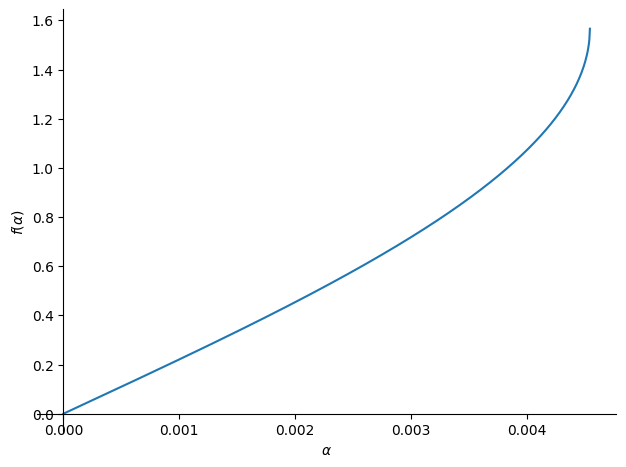

In [14]:
# 
alpha_maxMoon = alpha_max.subs([(D, distanceEarthMoon), (R, moonRadius)])
alpha_maxMoon
plot(surfaceAngleMoon(alpha), (alpha, 0, alpha_maxMoon))

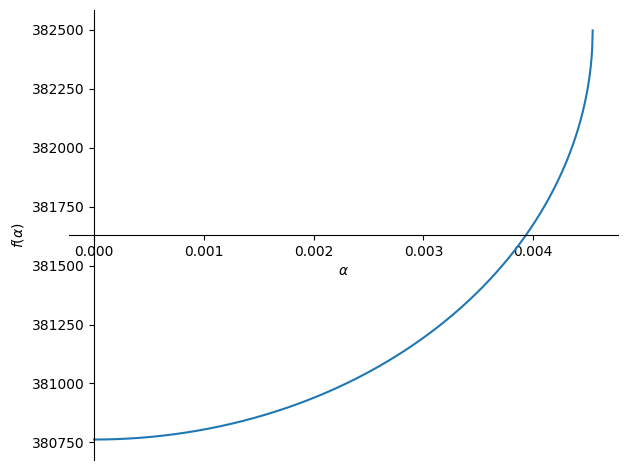

In [15]:
#
pathLengthMoon = pathLength.subs([(D, distanceEarthMoon), (R, moonRadius)])
pathLengthMoon

plot(pathLengthMoon(alpha), (alpha, alpha_maxMoon, 0))

In [16]:
# Sweep dynamics
angularSpeed = (alpha_end - alpha_start) / T             # Sweep angular speed in rad/sec
arrivalTime = Lambda(t, t + pathLength(sweepAngle(t))/c) # Arrival time at moon service as function of time
arrivalTime

Lambda(t, t + (D*cos(omega*t + asin(R/D)) - sqrt(-D**2*sin(omega*t + asin(R/D))**2 + R**2))/c)

In [17]:
arrivalTime(0)

D*sqrt(1 - R**2/D**2)/c

In [41]:
# solve(arrivalTime(t) - arrivalTime(0),t)
# no analytical solution

0.00571864866213344


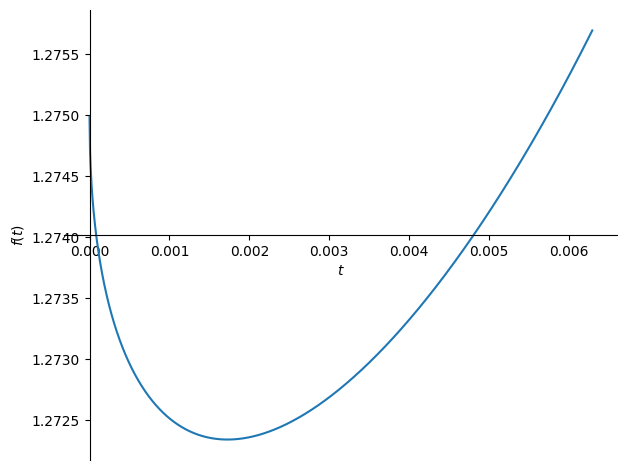

In [53]:
# Arrival time for Earth - Moon system:
sweepDuration = 0.01          # Sweep duration in seconds
angularSpeedMoon = angularSpeed.subs([(D, distanceEarthMoon), (R, moonRadius), (T, sweepDuration)])
arrivalTimeMoon = arrivalTime.subs([(D, distanceEarthMoon), (R, moonRadius), (c, speedOfLight), (omega, angularSpeedMoon)])

maxDupTime = re(nsolve(arrivalTimeMoon(t) - arrivalTimeMoon(0), 1)) #without re() it may return a tiny imaginary part
print( maxDupTime )

plot(arrivalTimeMoon(t), (t, 0, maxDupTime*1.1))
#plot(arrivalTimeMoon(t), (t, 0, sweepDuration/7000))